#  **Import Modules**


In [3]:
import re 
import nltk 
import numpy as np

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\廖周航\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import pandas as pd 
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction import _stop_words as stop_words
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize.casual import casual_tokenize
import pandas as pd
import re
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# **Import documents**

Check that the document is complete and that there is no Nan.

In [6]:
data_from_csv = pd.read_csv('C:/Users/廖周航/mycode/youtube_dataset.csv', encoding='utf-8') #Reads a CSV file into a pandas dataframe
dataset = np.loadtxt(data_from_csv, delimiter = "\t",  dtype = 'O')
data_from_csv.sample(10) #show us the first 10 rows

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
4880,Fifth Harmony - Worth It (Official Video) ft. ...,FifthHarmonyVEVO,UgzUXz7CH4yhpJFt4xR4AaABAg,MARIA GOMEZ,creo que soy la unica que habla español pero l...,2020-09-07T16:38:23Z,2
2734,Meghan Trainor - All About That Bass,MeghanTrainorVEVO,UgxUhFTU6Yr_AUwDLKR4AaABAg,*-*Crybaby's Milk*-*,Why is Meghan so underrated nowadays??,2020-09-08T12:25:40Z,4
6922,Jennifer Lopez - On The Floor ft. Pitbull,JenniferLopezVEVO,UgzFRwtBy64tBjnHZDR4AaABAg,Help me to reach 10k subs with 1 video,Just imagine how many people come here everyday.,2020-08-28T14:25:35Z,489
18839,"David Guetta - Play Hard ft. Ne-Yo, Akon (Offi...",David Guetta,UgzwijyWOTORiW9kdiV4AaABAg,E Vidz,"People Say that ""David Guetta only has British...",2020-09-02T16:33:36Z,28
319,Mark Ronson - Uptown Funk (Official Video) ft....,MarkRonsonVEVO,UgzzjXaNg4SzNn_wIMh4AaABAg,Ritesh Raj,I'm editing this comment so that no one can kn...,2020-08-21T01:36:46Z,10376
9033,Numb (Official Video) - Linkin Park,Linkin Park,Ugz3hAE-zr5NTC8QGGp4AaABAg,Help me to gain 1000 subscribers,"2% of people who are watching this comment, I ...",2020-09-06T09:43:32Z,10
16558,MC Kevinho - Olha a Explosão (KondZilla) | Off...,Canal KondZilla,UgxNC-T0JjRm1ZDW22J4AaABAg,Sebas FF,Like los que hablamos español,2020-09-08T18:42:24Z,2
6517,Christina Perri - A Thousand Years [Official M...,Christina Perri,Ugx8Lz6O1xz1tQF755F4AaABAg,Epic Gamer YT,"*8 Years Later😢* *""If You Are Seeing This Comm...",2020-09-06T14:55:52Z,10
16437,Pharrell Williams - Happy (Official Music Video),iamOTHER,UgyOCR1qZR8lKalgU9B4AaABAg,Legend 1,Am here since of Mr.Virus and his friend Quara...,2020-06-26T15:35:37Z,27
18915,Ed Sheeran - Photograph (Official Music Video),Ed Sheeran,Ugjadw0ddgHIs3gCoAEC,Raphael Gomes,aaaaaaaaaaaand I'm crying,2015-05-10T15:12:02Z,3481


In [7]:
data_from_csv is None

False

In [8]:
np.shape(data_from_csv)

(19300, 7)

In [9]:
data_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video Name    19300 non-null  object
 1   Channel Name  19300 non-null  object
 2   Comment Id    19300 non-null  object
 3   User Name     19299 non-null  object
 4   Comment       19300 non-null  object
 5   Date          19300 non-null  object
 6   Likes         19300 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


# **Classification**
Q:Which comment received the most likes? Which channel has the most likes in its comments？ Which play has the most comments？
Compare the likes obtained for each channel?
Check the likes sum by years. Check frequent videos for comments.
Which videos have received the most likes for their comments? 
See what kind of words are used in comments frequently?

In [10]:
# Classification
#Which comment received the most likes
Sorted_data = data_from_csv
Sorted_data.sort_values("Likes", axis=0, ascending=False,inplace=True, na_position='first')
Sorted_data
print(Sorted_data.iloc[0])

Video Name      Marshmello - Alone (Official Music Video)
Channel Name                                   Marshmello
Comment Id                     UgypW6-bk7J6JZJF1954AaABAg
User Name                                      Marshmello
Comment                                   1,000,000,000 ✅
Date                                 2018-10-15T19:33:03Z
Likes                                              540334
Name: 5201, dtype: object


In [11]:
#Which channel has the most likes in its comments？ Which play has the most comments？
#Learning Links --https://www.kaggle.com/code/usmanjon/self-comment-likes

# sort values by Like counts
data_from_csv.sort_values('Likes', ascending = False, inplace = True)
# Parsing the date and taking years
data_from_csv['Date'] = pd.to_datetime(data_from_csv['Date'])
data_from_csv['year'] = data_from_csv['Date'].dt.year

In [12]:
#  reset index (so that it will be ordered) and drop unimportant columns
data_from_csv = data_from_csv.reset_index().drop(['index', 'Comment Id', 'Date'], axis = 1)
# Let's change the columns' name to make it easier to type and read
data_from_csv.columns = ['video', 'channel', 'user', 'comment', 'likes', 'year']

In [13]:
data_from_csv.head(4)

,video,channel,user,comment,likes,year
0,Marshmello - Alone (Official Music Video),Marshmello,Marshmello,"1,000,000,000 ✅",540334,2018
1,Eminem - Rap God (Explicit) [Official Video],EminemVEVO,Goldenightime,Eminem raps faster than my internet connection,438973,2016
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,LR ICED WOLF,3.2 Million comments if you find mine your a l...,370547,2020
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,356081,2019


<AxesSubplot:ylabel='channel'>

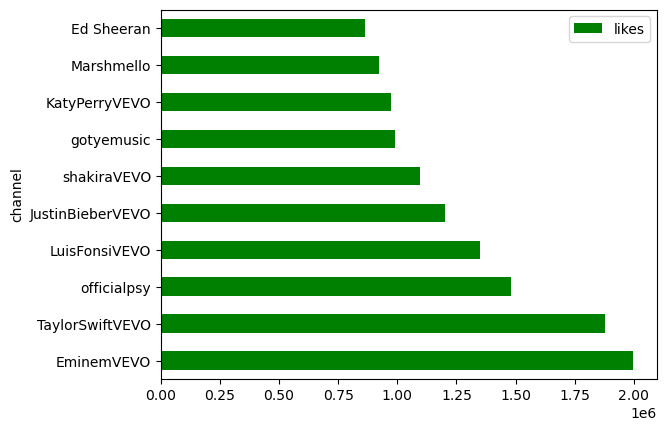

In [14]:
# Compare the likes obtained for each channel

data_from_csv[['channel', 'likes']].groupby('channel').sum().nlargest(columns = ['likes'],n = 10).plot(kind = 'barh', color = 'g')

In [15]:
#EminemVEVO is the most popular channel

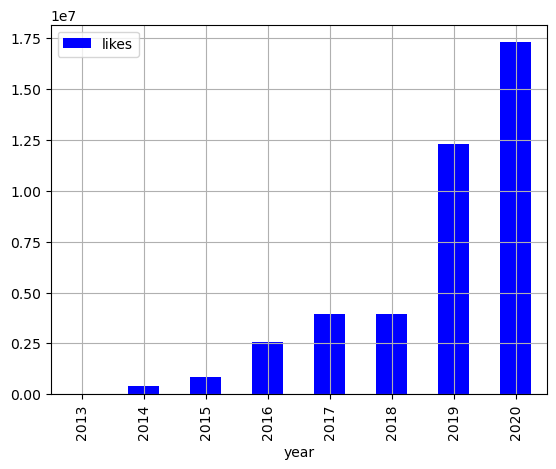

In [16]:
#the likes sum by years   -https://www.kaggle.com/code/usmanjon/self-comment-likes
data_from_csv[['likes', 'year']].groupby('year').sum().plot(kind = 'bar',color = 'b')
plt.grid()

In [17]:
#Based on the image, it is inferred that the likes are increasing every year because the number of youtube users is increasing
#The most-like-get channels are channels about song and singers

<AxesSubplot:>

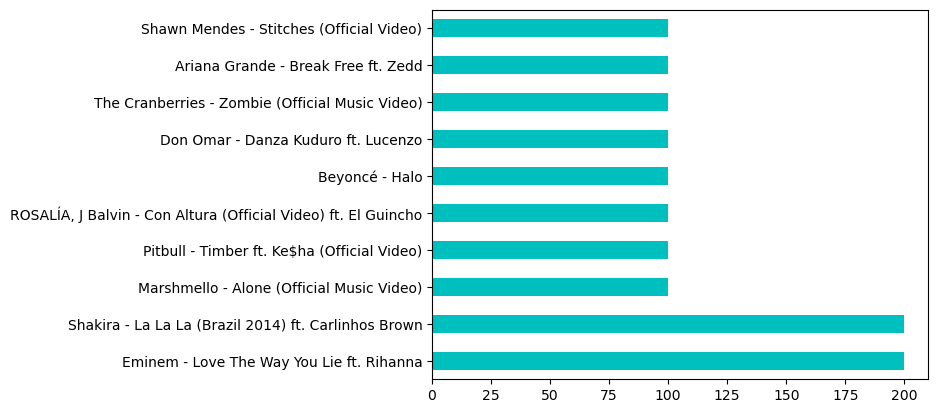

In [18]:
# frequent videos for comments.you_tube['video'].value_counts().nlargest(15).plot(kind = 'barh', color = 'y') Learn from--https://www.kaggle.com/code/usmanjon/self-comment-likes
data_from_csv['video'].value_counts().nlargest(10).plot(kind = 'barh', color = 'c')

In [19]:
# Which videos have received the most likes for their comments?
plt.rc('axes', unicode_minus=False)
videos_comment_likeS = data_from_csv[['video', 'likes']].groupby('video').sum().nlargest(columns = ['likes'], n = 10)
videos_comment_likeS.reset_index(inplace = True)
videos_comment_likeS

,video,likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,1312089
1,PSY - GANGNAM STYLE(강남스타일) M/V,1221380
2,Eminem - Rap God (Explicit) [Official Video],999806
3,Gotye - Somebody That I Used To Know (feat. Ki...,991460
4,Marshmello - Alone (Official Music Video),921046
5,Wiz Khalifa - See You Again ft. Charlie Puth [...,785469
6,Lady Gaga - Bad Romance (Official Music Video),734892
7,Lil Pump - &quot;Gucci Gang&quot; (Official Mu...,729971
8,Justin Bieber - Baby (Official Music Video) ft...,713011
9,Queen – Bohemian Rhapsody (Official Video Rema...,701303


In [20]:
#Despacito ft. Daddy Yankee is the video which get the most comments' like in total

In [21]:
# see what kind of words are used in comments frequently  Learn from--https://www.kaggle.com/code/alexandrshachnev/youtube-regression
all_comments = ' '.join(data_from_csv['comment'].values)

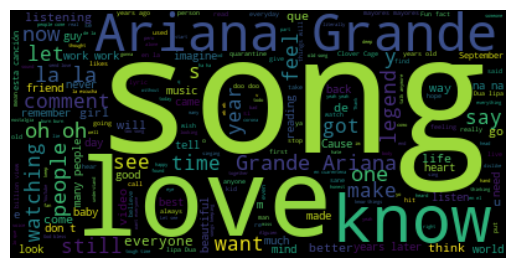

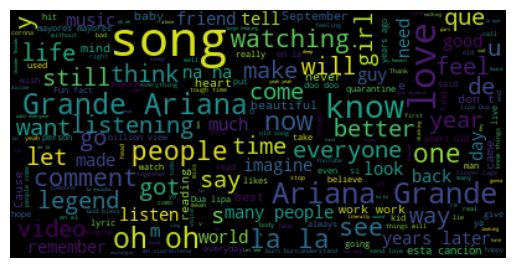

In [22]:
#Learn from--https://www.kaggle.com/code/alexandrshachnev/youtube-regression
from wordcloud import WordCloud

wordcloud = WordCloud().generate(all_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(all_comments)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
from nltk.probability import FreqDist

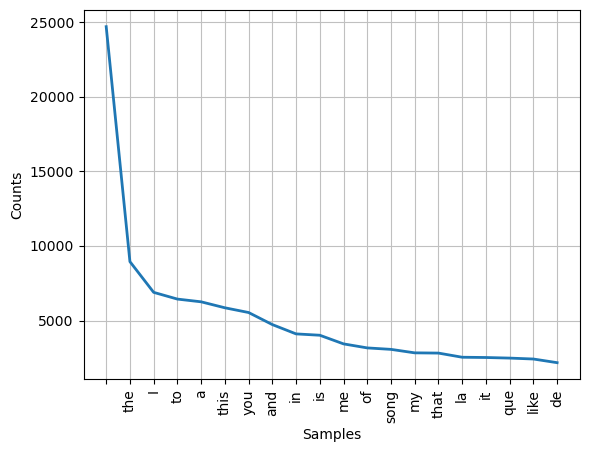

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
#Analyse the most frequently occurring words in comments --https://www.kaggle.com/code/alexandrshachnev/youtube-regression
fdist = FreqDist(all_comments.split(' '))
fdist.plot(20,cumulative=False)

In [25]:
most_common = [item[0] for item in fdist.most_common(20)]
most_common

['',
 'the',
 'I',
 'to',
 'a',
 'this',
 'you',
 'and',
 'in',
 'is',
 'me',
 'of',
 'song',
 'my',
 'that',
 'la',
 'it',
 'que',
 'like',
 'de']

# **Naive Bayes Classifier**

In [28]:
#Naive Bayes classfication  
#Reference （https://allmainashley.github.io/2021/02/06/Notes/Machine%20Learning/Naive%20Bayes%20in%20Python/）

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import StandardScaler

training = pd.read_csv('C:/Users/廖周航/mycode/youtube_dataset.csv',encoding='utf-8')
test = pd.read_csv('C:/Users/廖周航/mycode/youtube_dataset.csv',encoding='utf-8')

Comment = list(training.columns)

training[Comment] = training[Comment].apply(pd.to_numeric, errors='coerce').fillna(0.0)

training= pd.DataFrame(training, dtype='float')

Comment = list(test.columns)

test[Comment] = test[Comment].apply(pd.to_numeric, errors='coerce').fillna(0.0)

test= pd.DataFrame(test, dtype='float')


In [29]:
#"""Create the X, Y, Training and Test"""
x_train = training.drop('Comment', axis=1)       # delete 'Comment' colum,which indicate the category of Species
y_train = training.loc[:, 'Comment']             # get 'Comment' column as result
x_test = test.drop('Comment', axis=1)
y_test = test.loc[:, 'Comment']


In [30]:
#"""Init the Gaussian Classifier"""
model = GaussianNB()

In [31]:
model.fit(x_train, y_train)

GaussianNB()

In [32]:
pred = model.predict(x_test)

In [33]:
mat = confusion_matrix(pred, y_test)

In [34]:
names = np.unique(pred)

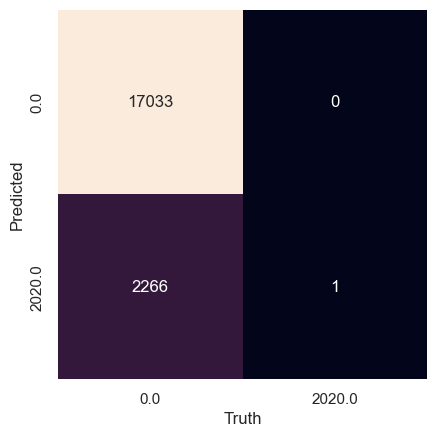

In [35]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

**Comments on making a Naive Bayes classifier based on the number of Likes**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/廖周航/mycode/youtube_dataset.csv")
data

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [3]:
data = data.drop(["Video Name","Comment Id",'User Name','Date'],axis=1)
data

,Channel Name,Comment,Likes
0,LuisFonsiVEVO,The people who liked this comment is officiall...,98280
1,LuisFonsiVEVO,"- Wait, it's 7B views\n- Always has been",773
2,LuisFonsiVEVO,*Teacher: What is the population of the Earth?...,356081
3,LuisFonsiVEVO,Let's be honest this wasn't your recommendatio...,13
4,LuisFonsiVEVO,Types Of People:\n10% Enjoying Song \n90% Chec...,122
...,...,...,...
19295,ZaynVEVO,Claim your “before 1 billion” certificate here,5087
19296,ZaynVEVO,This means that you are before 1 billion views.,6
19297,ZaynVEVO,We won't have school till 2021 \nMay God help ...,5
19298,ZaynVEVO,Literally saw this song from 1M -> 996M,4


In [5]:
data = data.drop(["Channel Name"],axis=1)
data

,Comment,Likes
0,The people who liked this comment is officiall...,98280
1,"- Wait, it's 7B views\n- Always has been",773
2,*Teacher: What is the population of the Earth?...,356081
3,Let's be honest this wasn't your recommendatio...,13
4,Types Of People:\n10% Enjoying Song \n90% Chec...,122
...,...,...
19295,Claim your “before 1 billion” certificate here,5087
19296,This means that you are before 1 billion views.,6
19297,We won't have school till 2021 \nMay God help ...,5
19298,Literally saw this song from 1M -> 996M,4


In [6]:
data["Likes"][data.Likes<500]=1

data["Likes"][data.Likes>500]=2

C:\Users\廖周航\AppData\Local\Temp\ipykernel_20608\3779176009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Likes"][data.Likes<500]=1
C:\Users\廖周航\AppData\Local\Temp\ipykernel_20608\3779176009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Likes"][data.Likes>500]=2


In [7]:
data

,Comment,Likes
0,The people who liked this comment is officiall...,2
1,"- Wait, it's 7B views\n- Always has been",2
2,*Teacher: What is the population of the Earth?...,2
3,Let's be honest this wasn't your recommendatio...,1
4,Types Of People:\n10% Enjoying Song \n90% Chec...,1
...,...,...
19295,Claim your “before 1 billion” certificate here,2
19296,This means that you are before 1 billion views.,1
19297,We won't have school till 2021 \nMay God help ...,1
19298,Literally saw this song from 1M -> 996M,1


In [8]:
data is None

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  19300 non-null  object
 1   Likes    19300 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 301.7+ KB


In [10]:
data.Likes.value_counts()

1      15237
2       4059
500        4
Name: Likes, dtype: int64

In [11]:
# learn from  https://www.kaggle.com/code/codeblogger/natural-language-process-accuracy-91

import pandas as pd
import numpy as np
import nltk 
nltk.download('punkt')
import re
from nltk.corpus import stopwords

Comment_list = []
for Comment in data.Comment:
    Comment = re.sub("[^a-zA-Z]"," ", Comment)
    Comment = Comment.lower()
    Comment = nltk.word_tokenize(Comment)
    lemma = nltk.WordNetLemmatizer()
    Comment = [ lemma.lemmatize(word) for word in Comment]
    Comment = " ".join(Comment)
    Comment_list.append(Comment)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\廖周航\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# learn from  https://www.kaggle.com/code/codeblogger/natural-language-process-accuracy-91
from sklearn.feature_extraction.text import CountVectorizer
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words="english")
space_matrix = count_vectorizer.fit_transform(Comment_list).toarray() # 0-1

In [13]:
y = data["Likes"].values
y

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [14]:
x = space_matrix
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17370, 1000)
x_test (1930, 1000)
y_train (17370,)
y_test (1930,)


In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Accuracy => ", nb.score(x_test,y_test)*100)

Accuracy =>  34.35233160621762


In [17]:
all_words = count_vectorizer.get_feature_names()
print("Most used words: ",all_words[50:100])

Most used words:  ['bad', 'bailando', 'baile', 'ball', 'balvin', 'bamos', 'band', 'basically', 'bass', 'beat', 'beating', 'beautiful', 'beb', 'bed', 'believe', 'believer', 'belong', 'bendiga', 'beso', 'best', 'better', 'bieber', 'bien', 'big', 'bilh', 'billion', 'billionaire', 'birthday', 'black', 'blackpink', 'blame', 'bless', 'blink', 'blood', 'blow', 'body', 'booty', 'born', 'boseman', 'bout', 'boy', 'boyce', 'boyfriend', 'br', 'brain', 'brasil', 'brasileiro', 'brasileiros', 'break', 'breaking']


C:\APP\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


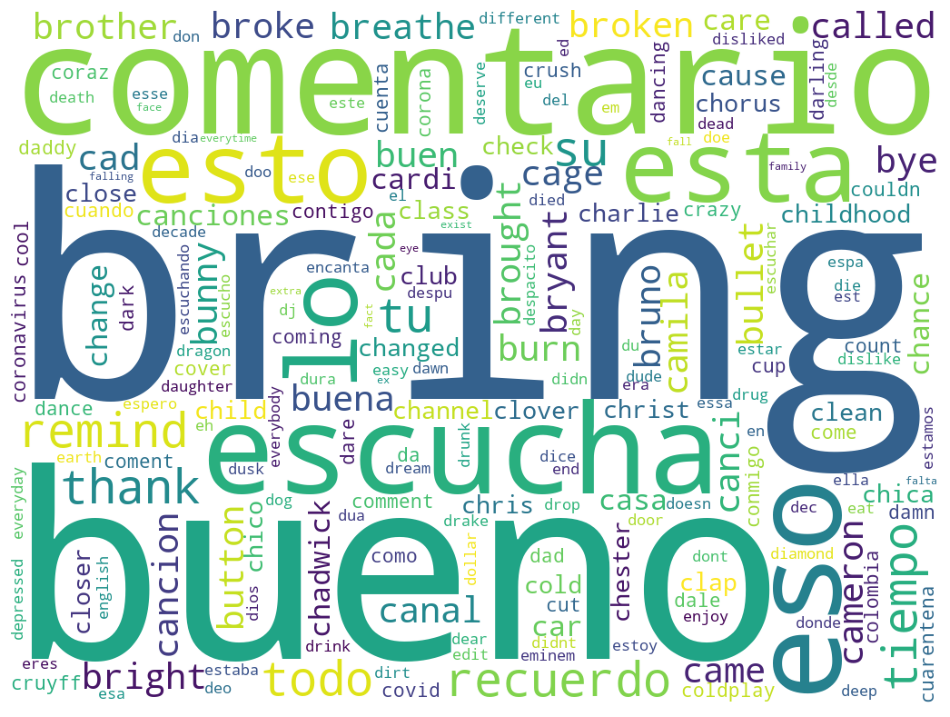

In [22]:
# learn from  https://www.kaggle.com/code/codeblogger/natural-language-process-accuracy-91
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words[100:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: ",rf.score(x_test,y_test)*100)

accuracy:  76.26943005181347


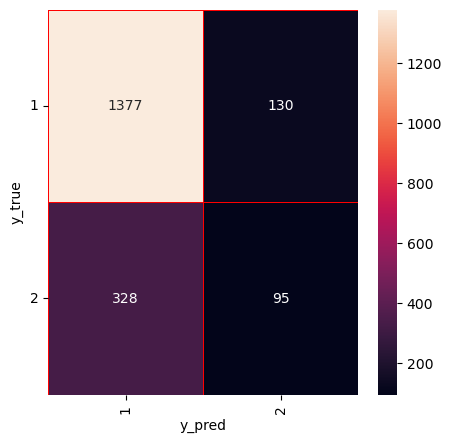

In [23]:
# learn from  https://www.kaggle.com/code/codeblogger/natural-language-process-accuracy-91
y_pred=rf.predict(x_test)
y_true=y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["1","2"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names,rotation=90)
ax.set_yticklabels(names,rotation=0)
plt.show()

# LSA 

Key Analysis Comments

In [18]:
#LSA    According to ---  week7 ----
df_2= pd.read_csv('C:/Users/廖周航/mycode/youtube_dataset.csv', encoding='utf-8')
df = df_2.rename(columns={'Comment': 'text'})
df

,Video Name,Channel Name,Comment Id,User Name,text,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [179]:
#deleteIds = []
#for index, row in df.iterrows():
 #    if (len(df.iloc[index]['AQI Category'].split()) > 4):
    #    deleteIds.append(index)

In [180]:
#endIndex = len(deleteIds)-1
#for i in range(len(deleteIds)):
   # print(deleteIds[endIndex-i])
  #  df.drop(index=deleteIds[endIndex-i], inplace=True)

#df

In [181]:


lem = WordNetLemmatizer()
def my_tokeniser(doc):
    #Split on spaces
    tokens = re.split(r'[-\s.,;!?]+', doc)
    return [lem.lemmatize(t.lower()) for t in tokens if not t in stop_words.ENGLISH_STOP_WORDS]

In [182]:
tfidf_vectoriser = TfidfVectorizer(tokenizer=my_tokeniser)


In [183]:
import nltk
nltk.download('omw-1.4')
tfidf = tfidf_vectoriser.fit_transform(df2['text'])
#Save list of unique tokens (vocab) for laterAQI Category
vocab = tfidf_vectoriser.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf.todense(), columns = vocab)

print(tfidf.todense().shape)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\廖周航\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(19300, 32478)


In [184]:

#Subtract mean
tfidf_df = tfidf_df - tfidf_df.mean()

In [185]:

#How many topics?
num_topics =10
pd.options.display.max_columns=num_topics
labels = ['topic{}'.format(i) for i in range(num_topics)]

In [19]:

#Calculate topics
svd = TruncatedSVD(n_components = num_topics, n_iter = 100) 
svd_topic_vectors = svd.fit_transform(tfidf_df.values)

In [17]:
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=labels)
svd_topic_vectors_df.sample(10)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
16217,0.209080,-0.121132,0.033264,0.268852,-0.019969,-0.193683,0.006081,-0.000052,0.040559,-0.006910
5818,-0.016760,-0.009982,-0.045138,-0.014253,-0.013481,-0.046575,-0.032131,-0.025968,-0.026628,-0.042152
3512,0.001794,0.061496,-0.027664,-0.039477,-0.080328,-0.003159,-0.055647,-0.028523,0.002926,-0.053184
11037,-0.146884,-0.121515,0.128793,-0.008183,0.026039,0.092924,0.006033,-0.012546,-0.004776,-0.108631
6098,0.061656,0.182812,-0.001374,0.018703,-0.081103,0.024235,0.083661,0.019231,-0.057591,0.069872
18270,-0.007205,0.016893,-0.043725,-0.012229,-0.017067,-0.023513,0.077984,-0.019781,0.001254,0.030906
2638,0.067828,-0.061416,-0.036646,-0.024432,0.087569,-0.001850,-0.059846,-0.021367,-0.092528,0.054328
7417,0.030679,0.114094,-0.013756,0.003178,-0.115722,0.043666,0.010928,-0.027255,-0.026938,-0.034999
19088,-0.030845,-0.005584,-0.041153,-0.033310,0.018777,-0.017538,-0.014669,-0.028459,0.002666,-0.017713
3183,0.067185,-0.058637,0.005824,-0.076515,0.034671,-0.021675,-0.010623,-0.086974,-0.001860,0.026868


In [18]:

#How much does each topic apply to each token?
topic_weights = pd.DataFrame(svd.components_.T, index=vocab, columns=labels)
topic_weights.sample(10) #display it

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
(hustlas),-5.203284e-06,2.294401e-06,-5.606698e-06,-8.502993e-06,1.024554e-05,-9.713818e-06,-9.944797e-06,-1.313885e-05,3.515654e-07,2.186004e-05
dissed,-5.984069e-05,5.911810e-05,-1.104903e-04,-6.233577e-05,2.237232e-04,1.303532e-06,-6.445673e-05,-2.708872e-04,2.622254e-04,8.885356e-05
cero,-4.408657e-05,-3.936111e-05,5.879142e-05,-4.172795e-06,1.443712e-05,5.922836e-05,-8.503828e-06,-1.637499e-06,-1.325695e-05,-7.844883e-05
504,-3.629040e-07,-2.024519e-07,-2.315084e-07,-5.829749e-07,1.650992e-07,-6.806126e-07,-1.546730e-07,-6.876048e-07,4.151975e-07,-1.625752e-07
1,-6.345337e-03,-9.481846e-04,-3.800035e-02,-1.834069e-02,1.176153e-02,-2.593528e-02,1.577153e-02,2.158505e-02,-3.518208e-02,9.178513e-02
☑️,2.286235e-05,-3.624112e-05,-1.221149e-04,-1.098537e-04,1.178020e-04,4.688713e-05,-9.366108e-05,3.578494e-05,7.566050e-05,-5.893126e-05
'e,-4.001216e-05,-3.044216e-05,6.030429e-05,-4.617708e-06,1.815050e-05,5.441864e-05,-1.021934e-05,1.737050e-06,-1.755254e-05,-7.152173e-05
bajando,-2.868495e-05,-2.430470e-05,3.063449e-05,-7.708512e-06,9.162941e-06,2.614992e-05,-5.404957e-06,-8.359178e-06,-1.306512e-06,-4.966417e-05
cheguei,-4.114707e-05,-2.553315e-05,-1.748244e-05,-5.641553e-05,1.554949e-05,-6.799318e-05,-2.303207e-05,-8.687599e-05,4.357306e-05,-2.686794e-05
401%i,-1.704951e-05,1.732846e-04,5.766809e-05,-1.202357e-04,-1.351393e-04,-7.991041e-05,-1.578823e-04,-1.833207e-04,-5.341830e-05,-1.923665e-04


In [20]:
short_text = [t[:50] for t in df["text"]]

In [21]:
#How much does each topic apply to each tweet?
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=labels, index = short_text)
svd_topic_vectors_df.sample(30)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
A random person: how fast can you rap? \n\n\nEminem:,-0.035961,-0.016984,-0.025725,-0.040523,0.012472,-0.038457,-0.015128,-0.024243,0.005602,0.012435
What planet did this people come from that they di,0.018381,0.086348,-0.130468,0.066224,0.077116,0.081637,-0.089568,-0.004151,-0.056327,-0.087823
"""Selena Gomez has only American fans""\nLike if you'",0.043304,-0.063963,0.004215,-0.060346,0.038257,-0.008376,-0.027859,-0.048841,-0.046204,0.079869
"""Ah nothing better than a good song in this quaran",0.002212,0.098713,0.027043,-0.029857,-0.042503,-0.013303,-0.031394,-0.024692,-0.018894,-0.042186
What thing you fade I say to my self that am the u,-0.022312,0.059579,-0.004573,-0.024371,0.052241,-0.001589,-0.041561,-0.016939,-0.017200,0.067266
"Andrés Celis, no encuentro tu comentario xd",-0.052726,-0.033181,0.000194,-0.038156,0.011614,-0.019692,-0.017060,-0.028540,0.011491,-0.016786
"Parents "" Let's record His Life, He can use it as",-0.016174,-0.015441,-0.061590,0.003693,0.026259,-0.115049,-0.022554,-0.003708,-0.018008,-0.025166
Darell siempre la rompe con su Flow su voz y sus f,-0.086133,-0.067945,0.062286,-0.003823,0.011775,0.050728,0.030619,-0.008310,0.002178,-0.040537
+1 if you hear this after 2 in the evening trying,-0.033023,-0.016987,-0.023704,-0.043811,0.007485,-0.031663,-0.015889,-0.023795,0.007859,0.003386
اكو عرب الله يقطع الصصصين هي اللي خلتني اشوف هذا ا,-0.035937,-0.019163,-0.016739,-0.036574,0.007835,-0.033337,-0.011039,-0.030235,0.014925,-0.006097


In [22]:
#Highest scoring tweets for each topic
for topic in labels:
    print("________" + topic)
    #Get last reviews 10 in list (highest scoring for each topic)
    print(df["text"].values[svd_topic_vectors_df[topic].argsort().values[-10:]])

________topic0
["4 years later, if you're watching this you're a legend."
 "Almost 4 Years later, if you're watching this you're a legend."
 "4 years later, if you're watching this you're a legend."
 "4 years later, if you're watching this, you're a legend."
 "4 years later, if you're still watching this, you're a legend."
 "4 years later, if you're still watching this, you're a legend."
 "4 years later, if you're watching this you're a legend."
 "4 years later, if you're watching this you're legend."
 "-4 years later, If you're watching this you're a legend."
 "-4 years later, If you're watching this you're a legend."]
________topic1
['This song and “Clover Cage - On My Mind” are the two songs keeping me sane through these tough times. I just want to send love to everyone and I want everyone to know things will get better. We are in this together......'
 'This song and “Clover Cage - On My Mind” are the two songs keeping me sane through these tough times. I just want to send love to e

In [23]:

svd_topic_vectors_df.iloc[0]

topic0    0.003812
topic1   -0.008141
topic2   -0.177564
topic3    0.011923
topic4    0.147334
topic5   -0.056376
topic6   -0.056524
topic7    0.195910
topic8   -0.209703
topic9    0.024869
Name: The people who liked this comment is officially be, dtype: float64

In [24]:
num_terms = 20
for i in range(num_topics):
    print("___topic " + str(i) + "___")
    topicName = "topic" + str(i)
    weightedlist = topic_weights.get(topicName).sort_values()[-num_terms:]
    print(weightedlist.index.values)

___topic 0___
['7' '3' 'just' "let's" 'quarantine' '6' '5' '2020' '4' 'september'
 'people' 'old' 'listening' 'song' '' 'later' 'legend' 'year' 'watching'
 "you're"]
___topic 1___
['listening' 'come' 'imagine' 'old' 'mind”' 'send' 'tough' 'know'
 'keeping' 'cage' 'sane' '“clover' 'better' '' 'time' 'thing' 'love'
 'just' 'want' 'song']
___topic 2___
['escuchando' 'legend' 'quien' 'time' 'que' 'mind”' 'better' 'love' 'send'
 'tough' 'cage' 'keeping' '“clover' 'sane' '2020' "you're" 'thing' 'la'
 'want' 'en']
___topic 3___
['la' 'quarantine' 'song' 'escuchando' 'alguien' "people's" 'septiembre'
 'quien' 'just' 'everyday' 'come' 'imagine' 'en' 'watching' 'listening'
 "let's" 'people' '' 'september' '2020']
___topic 4___
['time' 'mind”' 'know' 'better' 'comment' 'send' 'tough' 'keeping'
 '“clover' 'cage' 'sane' 'watching' "you're" 'thing' 'want' 'everyday'
 'just' 'come' 'imagine' 'people']
___topic 5___
['esta' 'si' 'later' 'el' 'escuchando' "you're" 'cuarentena' 'quien'
 'like' 'que' '' 

# **LDA**

In [25]:
##LDA

# Your code here (feel free to add cells)
#We calculate LDA on the Bag Of Words, NOT TFIDF
count_vectoriser = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words = count_vectoriser.fit_transform(df["text"])
vocab = count_vectoriser.get_feature_names_out()

print(bag_of_words.todense().shape)

(19300, 32478)


In [26]:
lda = LatentDirichletAllocation(n_components=num_topics,
                                random_state=123,
                                learning_method='batch')

In [27]:
lda_topics = lda.fit_transform(bag_of_words)

In [28]:

#How much does each topic apply to each song?
lda_topic_vectors_df = pd.DataFrame(lda_topics, columns=labels)
lda_topic_vectors_df.sample(10)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
11689,0.016667,0.016669,0.016669,0.516696,0.016667,0.016667,0.016669,0.349964,0.016667,0.016667
5296,0.020001,0.020000,0.020000,0.819994,0.020000,0.020003,0.020000,0.020001,0.020000,0.020000
1821,0.011111,0.518879,0.199562,0.203771,0.011112,0.011114,0.011115,0.011111,0.011112,0.011113
8925,0.009091,0.009092,0.009091,0.009091,0.009091,0.009091,0.009091,0.918175,0.009091,0.009095
8723,0.010000,0.010001,0.010000,0.010003,0.010000,0.010001,0.010000,0.790327,0.010000,0.129668
15044,0.025002,0.025006,0.025001,0.774984,0.025000,0.025000,0.025004,0.025002,0.025000,0.025001
1088,0.025000,0.025002,0.025000,0.774995,0.025000,0.025001,0.025000,0.025001,0.025000,0.025000
12830,0.007143,0.007145,0.007144,0.699485,0.007143,0.007144,0.243368,0.007143,0.007144,0.007143
3150,0.005559,0.005558,0.005557,0.949984,0.005556,0.005556,0.005558,0.005556,0.005558,0.005557
11793,0.016667,0.191665,0.016667,0.674998,0.016667,0.016667,0.016667,0.016669,0.016667,0.016667


In [29]:
#df["text"][1000]

In [30]:
#Highest scoring reviews for each topic
for topic in labels:
    print(topic)
    #Get last songs 10 in list (highest scoring for each topic)
    print(df["text"].values[lda_topic_vectors_df[topic].argsort().values[-10:]])

topic0
['I will be back every year the next decade so I can see this again.\n2020 : ✔︎\n2021 :\n2022 :\n2023 :\n2024 : \n2025 :\n2026 :\n2027 :\n2028 :\n2029 :\n2030 :\n2031 :\n2032 :\n2033 : \n2034 : \n2035 : \n2036 : \n2037 : \n2038 : \n2039 : \n2040 :\n🄿🄻🅂  🅁🄴🄰🄳  🄼🅈  🄽🄰🄼🄴'
 'I will be back every year the next decade so I can see this again.\n2020 : ✔︎\n2021 :\n2022 :\n2023 :\n2024 : \n2025 :\n2026 :\n2027 :\n2028 :\n2029 :\n2030 :\n2031 :\n2032 :\n2033 : \n2034 : \n2035 : \n2036 : \n2037 : \n2038 : \n2039 : \n2040 :\n\n🄿🄻🅂  🅁🄴🄰🄳  🄼🅈  🄽🄰🄼🄴'
 'I will be back every year the next decade so I can see this again.\n2020 : ✔︎\n2021 :\n2022 :\n2023 :\n2024 : \n2025 :\n2026 :\n2027 :\n2028 :\n2029 :\n2030 :\n2031 :\n2032 :\n2033 : \n2034 : \n2035 : \n2036 : \n2037 : \n2038 : \n2039 : \n2040 :\n\n🄿🄻🅂  🅁🄴🄰🄳  🄼🅈  🄽🄰🄼🄴'
 '2018 2019 2020 2021 2022 2023 2024 \n2025 2026 2027 2028 2029 2030 2031 \n2032 2033 2034 2035 2036 2037 2038 \n2039 2040 2041 2042 2043 2044 2045\n2046 2047 2048 2049 2050 2051 

In [31]:
for i, topic in enumerate(lda.components_):
    print("topic " + str(i) + ":")
    #Get last n tokens (highest values)
    print(vocab[topic.argsort()[-num_terms:]])

topic 0:
['2032' '2036' '2033' '2039' '2034' '2028' '2029' '2040' '2026' '2027'
 '2020' '2025' '2024' 'decade' '2023' 'eh' '2030' '2022' '2021' ':']
topic 1:
['need' 'girl' 'come' 'think' 'make' 'way' 'life' 'say' 'got' "it's"
 'time' 'just' 'love' 'song' "you're" 'know' '' 'like' "don't" "i'm"]
topic 2:
['gotta' 'like' 'play' 'got' 'just' 'song' 'love' 'gonna' 'oh' '' 'yeah'
 'make' 'know' "i'm" 'na' 'burn' 'let' "don't" 'work' 'la']
topic 3:
['day' 'billion' 'imagine' 'came' 'view' 'video' '1' 'later' 'legend'
 'just' 'comment' 'like' 'old' 'listening' 'watching' '2020' 'people'
 'year' 'song' '']
topic 4:
['lee' 'jackson' '1%' 'walker' 'paul' '100%' 'bryant' 'comment' 'bless'
 'live' 'god' '100' 'michael' 'parent' 'ha' 'people' '0%' 'mayores' '❤️'
 'rip:']
topic 5:
['keeping' 'lipa' 'cage' 'dua' 'tough' 'thunder' 'know' 'time' '\\'
 'better' 'thing' 'like' 'love' 'want' '' 'just' 'song' '\\\\' 'grande'
 'ariana']
topic 6:
['taylor' 'good' 'got' 'ooh' 'heart' 'feeling' 'stop' 'happy'